# Capstone: News Recommendation System

In [1]:
import pandas as pd
import numpy as np

In [2]:
consumer_data = pd.read_csv('data/consumer_transanctions.csv')

/Users/300013714/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
consumer_data.head()

,event_timestamp,interaction_type,item_id,consumer_id,consumer_session_id,consumer_device_info,consumer_location,country
0,1465413032,content_watched,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,content_watched,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,content_watched,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,content_followed,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,content_watched,-7820640624231356730,-445337111692715325,561148 1178424124714,NaN,NaN,NaN


In [4]:
consumer_data.describe()

,event_timestamp,item_id,consumer_id
count,7.231200e+04,7.231200e+04,7.231200e+04
mean,1.470103e+09,-3.033423e+16,1.252026e+16
std,7.258130e+06,5.344755e+18,5.022333e+18
min,1.457964e+09,-9.222795e+18,-9.223122e+18
25%,1.464876e+09,-4.726309e+18,-3.596627e+18
50%,1.468343e+09,1.893099e+16,-1.088422e+17
75%,1.474461e+09,4.441012e+18,3.766319e+18
max,1.488310e+09,9.222265e+18,9.210531e+18


In [5]:
consumer_data.shape

(72312, 8)

In [6]:
consumer_data['interaction_type'].value_counts()

content_watched         61086
content_liked            5745
content_saved            2463
content_commented_on     1611
content_followed         1407
Name: interaction_type, dtype: int64

In [7]:
consumer_data.shape[0]

72312

In [8]:
consumer_data['interaction_type'].value_counts()*100/consumer_data.shape[0]

content_watched         84.475606
content_liked            7.944739
content_saved            3.406074
content_commented_on     2.227846
content_followed         1.945735
Name: interaction_type, dtype: float64

In [9]:
interaction_stats = consumer_data['interaction_type'].value_counts()*100/consumer_data.shape[0]

In [10]:
interaction_stats

content_watched         84.475606
content_liked            7.944739
content_saved            3.406074
content_commented_on     2.227846
content_followed         1.945735
Name: interaction_type, dtype: float64

<AxesSubplot:ylabel='interaction_type'>

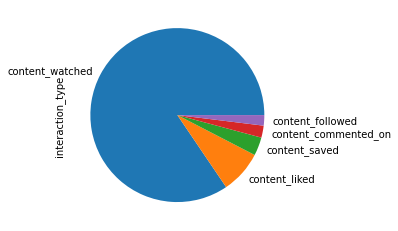

In [11]:
interaction_stats.plot.pie()

# EDA

In [12]:
consumer_data['item_id'].nunique()

2987

In [13]:
consumer_data['consumer_id'].nunique()

1895

In [14]:
consumer_data['consumer_session_id'].nunique()

28909

In [15]:
consumer_data.shape

(72312, 8)

In [16]:
consumer_data['consumer_device_info'].value_counts()

Android - Native Mobile App                                                                                                                         6761
Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36                                      1823
Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36                                      1146
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36                                           1076
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36                                       1059
                                                                                                                                                    ... 
Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Ch

In [17]:
consumer_data['consumer_device_info'].value_counts()*100/consumer_data.shape[0]

Android - Native Mobile App                                                                                                                         9.349762
Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36                                      2.521020
Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36                                      1.584799
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36                                           1.487996
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36                                       1.464487
                                                                                                                                                      ...   
Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.3

In [18]:
consumer_data['consumer_location'].value_counts()*100/consumer_data.shape[0]

SP    55.542649
MG    14.145647
NY     1.738301
TX     1.276413
GA     1.258436
        ...    
CE     0.001383
OR     0.001383
33     0.001383
MN     0.001383
MT     0.001383
Name: consumer_location, Length: 71, dtype: float64

In [19]:
location_stats = consumer_data['consumer_location'].value_counts()*100/consumer_data.shape[0]

<AxesSubplot:ylabel='consumer_location'>

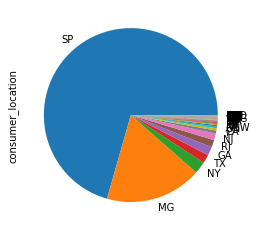

In [20]:
location_stats.plot.pie()

In [21]:
consumer_data['country'].value_counts()*100/consumer_data.shape[0]

BR    71.075340
US     6.440148
KR     0.330512
CA     0.312535
JP     0.199137
AU     0.190840
GB     0.030424
DE     0.026275
IE     0.019361
IS     0.017978
SG     0.015212
ZZ     0.015212
AR     0.009680
PT     0.008297
ES     0.004149
IN     0.004149
MY     0.002766
IT     0.002766
CL     0.001383
CO     0.001383
NL     0.001383
CH     0.001383
CN     0.001383
Name: country, dtype: float64

In [22]:
country_stats = consumer_data['country'].value_counts()*100/consumer_data.shape[0]

<AxesSubplot:>

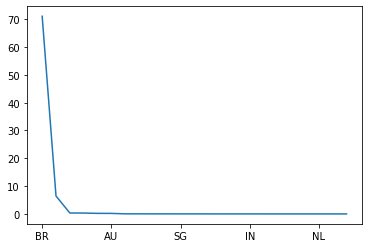

In [23]:
country_stats.plot()

<AxesSubplot:ylabel='country'>

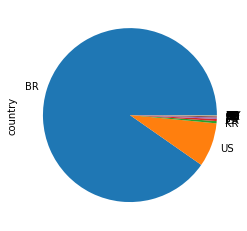

In [24]:
country_stats.plot.pie()

In [25]:
consumer_data.columns

Index(['event_timestamp', 'interaction_type', 'item_id', 'consumer_id',
       'consumer_session_id', 'consumer_device_info', 'consumer_location',
       'country'],
      dtype='object')

In [26]:
consumer_data = consumer_data[['consumer_id', 'item_id', 'interaction_type']]

In [27]:
consumer_data

,consumer_id,item_id,interaction_type
0,-8845298781299428018,-3499919498720038879,content_watched
1,-1032019229384696495,8890720798209849691,content_watched
2,-1130272294246983140,310515487419366995,content_watched
3,344280948527967603,310515487419366995,content_followed
4,-445337111692715325,-7820640624231356730,content_watched
...,...,...,...
72307,-9016528795238256703,-6590819806697898649,content_liked
72308,102305705598210278,-5813211845057621660,content_watched
72309,-9196668942822132778,-1999468346928419252,content_watched
72310,-9016528795238256703,-6590819806697898649,content_watched


In [28]:
consumer_data['interaction_type'].value_counts()*100/consumer_data.shape[0]

content_watched         84.475606
content_liked            7.944739
content_saved            3.406074
content_commented_on     2.227846
content_followed         1.945735
Name: interaction_type, dtype: float64

In [29]:
interactions = consumer_data['interaction_type'].value_counts()*100/consumer_data.shape[0]

In [30]:
type(interactions)

pandas.core.series.Series

In [31]:
interactions_df = pd.DataFrame(interactions)

In [32]:
interactions_df

,interaction_type
content_watched,84.475606
content_liked,7.944739
content_saved,3.406074
content_commented_on,2.227846
content_followed,1.945735


In [33]:
interactions_df.reset_index(inplace=True)

In [34]:
interactions_df

,index,interaction_type
0,content_watched,84.475606
1,content_liked,7.944739
2,content_saved,3.406074
3,content_commented_on,2.227846
4,content_followed,1.945735


In [35]:
interactions_df.columns = ['interaction_type', 'value']

In [36]:
interactions_df

,interaction_type,value
0,content_watched,84.475606
1,content_liked,7.944739
2,content_saved,3.406074
3,content_commented_on,2.227846
4,content_followed,1.945735


### Imputing Rating Value

Youtube Example: 10:1 proportional, rating = 1/10 = 0.1 watch, 1/1 = 1 like

100/84, 100/7.9, 100/3.4, 100/2.2, 100/1.9

In [38]:
interactions_df['rating'] = 100/interactions_df['value']

In [39]:
interactions_df

,interaction_type,value,rating
0,content_watched,84.475606,1.183774
1,content_liked,7.944739,12.586945
2,content_saved,3.406074,29.359318
3,content_commented_on,2.227846,44.886406
4,content_followed,1.945735,51.394456


In [40]:
consumer_rating = pd.merge(consumer_data, interactions_df, on='interaction_type', how='left')

In [41]:
consumer_rating.head()

,consumer_id,item_id,interaction_type,value,rating
0,-8845298781299428018,-3499919498720038879,content_watched,84.475606,1.183774
1,-1032019229384696495,8890720798209849691,content_watched,84.475606,1.183774
2,-1130272294246983140,310515487419366995,content_watched,84.475606,1.183774
3,344280948527967603,310515487419366995,content_followed,1.945735,51.394456
4,-445337111692715325,-7820640624231356730,content_watched,84.475606,1.183774


In [42]:
consumer_rating = consumer_rating[['consumer_id', 'item_id', 'rating']]

In [43]:
consumer_rating.head()

,consumer_id,item_id,rating
0,-8845298781299428018,-3499919498720038879,1.183774
1,-1032019229384696495,8890720798209849691,1.183774
2,-1130272294246983140,310515487419366995,1.183774
3,344280948527967603,310515487419366995,51.394456
4,-445337111692715325,-7820640624231356730,1.183774


In [45]:
consumer_rating.shape

(72312, 3)

In [46]:
consumer_rating.drop_duplicates(inplace=True)

In [47]:
consumer_rating.shape

(50938, 3)

In [48]:
consumer_rating.head()

,consumer_id,item_id,rating
0,-8845298781299428018,-3499919498720038879,1.183774
1,-1032019229384696495,8890720798209849691,1.183774
2,-1130272294246983140,310515487419366995,1.183774
3,344280948527967603,310515487419366995,51.394456
4,-445337111692715325,-7820640624231356730,1.183774


In [49]:
consumer_rating['consumer_id'].nunique()

1895

In [50]:
consumer_rating['item_id'].nunique()

2987

In [51]:
consumer_rating['news_id'] = consumer_rating.groupby(['item_id']).ngroup()

In [53]:
consumer_rating.head()

,consumer_id,item_id,rating,news_id
0,-8845298781299428018,-3499919498720038879,1.183774,933
1,-1032019229384696495,8890720798209849691,1.183774,2933
2,-1130272294246983140,310515487419366995,1.183774,1537
3,344280948527967603,310515487419366995,51.394456,1537
4,-445337111692715325,-7820640624231356730,1.183774,246


In [54]:
consumer_rating['user_id'] = consumer_rating.groupby(['consumer_id']).ngroup()

In [55]:
consumer_rating.head()

,consumer_id,item_id,rating,news_id,user_id
0,-8845298781299428018,-3499919498720038879,1.183774,933,33
1,-1032019229384696495,8890720798209849691,1.183774,2933,831
2,-1130272294246983140,310515487419366995,1.183774,1537,826
3,344280948527967603,310515487419366995,51.394456,1537,974
4,-445337111692715325,-7820640624231356730,1.183774,246,887


In [56]:
consumer_rating.shape

(50938, 5)

In [57]:
ratings = consumer_rating[['user_id','news_id','rating']]

In [59]:
ratings.head()

,user_id,news_id,rating
0,33,933,1.183774
1,831,2933,1.183774
2,826,1537,1.183774
3,974,1537,51.394456
4,887,246,1.183774


In [60]:
n_users = ratings.user_id.nunique()


n_items = ratings.news_id.nunique()

In [61]:
n_users

1895

In [62]:
n_items

2987

# Collaborative Filtering: User Based

## Create empty data matrix: user*news

In [63]:
data_matrix = np.zeros((n_users, n_items))


In [64]:
data_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
data_matrix.shape   

(1895, 2987)

## Fill user*news matrix with rating values

In [66]:
for line in ratings.itertuples():
    data_matrix[line[1]-1, line[2]-1] = line[3]


In [67]:
data_matrix

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [1.1837737, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [68]:
data_matrix.shape

(1895, 2987)

# Pairwise Distance

In [69]:
from sklearn.metrics.pairwise import pairwise_distances 

In [70]:

user_similarity = 1 - pairwise_distances(data_matrix, metric='cosine')


In [71]:
user_similarity

array([[1.        , 0.02414109, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02414109, 1.        , 0.        , ..., 0.15340145, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.04842681],
       ...,
       [0.        , 0.15340145, 0.        , ..., 1.        , 0.        ,
        0.02146289],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.00385051],
       [0.        , 0.        , 0.04842681, ..., 0.02146289, 0.00385051,
        1.        ]])

In [72]:
user_similarity.shape

(1895, 1895)

## Dot product of Data Matrix with Item similarity

In [73]:
item_prediction = np.dot(user_similarity, data_matrix)

In [74]:
item_prediction

array([[1.83459373e+00, 3.68777315e-02, 1.14255017e+00, ...,
        8.82600585e-02, 9.35840161e-02, 6.60403747e-01],
       [2.93685864e+00, 1.61545239e-01, 3.05004144e+00, ...,
        2.89711573e-01, 1.15790479e-01, 1.62356806e-01],
       [7.93356422e-03, 2.44448697e-02, 3.08748166e-01, ...,
        2.17376280e-01, 7.41728538e-03, 6.93588672e+00],
       ...,
       [6.31590587e-01, 4.28149928e-01, 3.48626730e+00, ...,
        4.79898799e-01, 1.30658931e-01, 2.98978192e+00],
       [1.18436118e-02, 8.84601250e-01, 4.23208344e+00, ...,
        6.61418198e-01, 8.98505071e-02, 5.39549384e-01],
       [7.15359786e-02, 7.67765450e-01, 2.69613012e+00, ...,
        6.31536138e-01, 1.01985431e-01, 8.08338273e+00]])

In [75]:
item_prediction.shape

(1895, 2987)

In [76]:
prediction_df = pd.DataFrame(item_prediction)

In [77]:
prediction_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986
0,1.834594,0.036878,1.142550,0.000000,0.847369,0.000000,0.401340,0.222077,0.000000,0.230748,...,0.324378,0.031024,0.015211,0.257113,0.022023,0.035775,0.018079,0.088260,0.093584,0.660404
1,2.936859,0.161545,3.050041,0.154531,0.542205,0.000000,1.048162,0.005746,0.212572,0.159210,...,0.256118,0.064520,0.004038,0.119351,0.182423,0.297769,0.295278,0.289712,0.115790,0.162357
2,0.007934,0.024445,0.308748,0.100403,0.109791,0.000000,0.733792,0.000000,0.111665,0.000000,...,0.369046,0.236964,0.171107,0.044028,0.017402,0.068311,0.176068,0.217376,0.007417,6.935887
3,0.000000,4.683629,2.543885,0.021112,0.351363,0.003107,0.067228,0.003784,0.003225,0.059524,...,0.057723,0.012797,0.004533,0.613159,0.404978,0.032977,0.009078,0.115796,0.011678,0.196789
4,0.038039,0.039096,0.707659,0.016496,0.130117,0.000747,0.112174,0.032241,0.328094,0.033122,...,0.032499,0.017534,0.000531,0.143672,0.191928,0.113903,0.302240,0.167244,0.013098,0.040921


In [78]:
prediction_df.shape

(1895, 2987)

## Get recommended News for user 17

In [79]:
prediction_df.iloc[17].sort_values(ascending=False)[:10]

104     38.437199
575     29.147798
1540    27.983292
1095     7.841106
1745     7.756659
870      7.742801
1632     6.853349
2188     6.853349
2552     6.853349
1495     6.853349
Name: 17, dtype: float64

In [80]:
recommended_news_df = pd.DataFrame(prediction_df.iloc[17].sort_values(ascending=False))

In [81]:
recommended_news_df.head()

,17
104,38.437199
575,29.147798
1540,27.983292
1095,7.841106
1745,7.756659


In [82]:
recommended_news_df.reset_index(inplace=True)

In [83]:
recommended_news_df.head()

,index,17
0,104,38.437199
1,575,29.147798
2,1540,27.983292
3,1095,7.841106
4,1745,7.756659


In [84]:
recommended_news_df.columns = ['news_id', 'score']

In [87]:
recommended_news_df.head(10)

,news_id,score
0,104,38.437199
1,575,29.147798
2,1540,27.983292
3,1095,7.841106
4,1745,7.756659
5,870,7.742801
6,1632,6.853349
7,2188,6.853349
8,2552,6.853349
9,1495,6.853349


In [86]:
recommended_news_df.shape

(2987, 2)

### merge with news_rating data

In [88]:
consumer_rating.head()

,consumer_id,item_id,rating,news_id,user_id
0,-8845298781299428018,-3499919498720038879,1.183774,933,33
1,-1032019229384696495,8890720798209849691,1.183774,2933,831
2,-1130272294246983140,310515487419366995,1.183774,1537,826
3,344280948527967603,310515487419366995,51.394456,1537,974
4,-445337111692715325,-7820640624231356730,1.183774,246,887


In [89]:
item_mapping = consumer_rating[['item_id', 'news_id']]

In [90]:
item_mapping.head()

,item_id,news_id
0,-3499919498720038879,933
1,8890720798209849691,2933
2,310515487419366995,1537
3,310515487419366995,1537
4,-7820640624231356730,246


In [91]:
item_mapping.shape

(50938, 2)

In [92]:
item_mapping_final = item_mapping.drop_duplicates()

In [93]:
item_mapping_final.shape

(2987, 2)

In [94]:
item_mapping_final.head()

,item_id,news_id
0,-3499919498720038879,933
1,8890720798209849691,2933
2,310515487419366995,1537
4,-7820640624231356730,246
6,-8864073373672512525,82


In [95]:
recommended_merged = pd.merge(recommended_news_df, item_mapping_final, how='left', on='news_id')

In [96]:
recommended_merged.head()

,news_id,score,item_id
0,104,38.437199,-8722526817358894474
1,575,29.147798,-5750828394349042089
2,1540,27.983292,335910242745901755
3,1095,7.841106,-2373876979584952849
4,1745,7.756659,1632166079091127830


In [98]:
recommended_merged.shape

(2987, 3)

In [99]:
content = pd.read_csv('data/platform_content.csv')

In [101]:
content.head()

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
0,1459192779,content_pulled_out,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,content_present,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,content_present,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,content_present,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,content_present,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [102]:
content.shape

(3122, 13)

In [103]:
news_title = content[['item_id','title']]

In [104]:
news_title.head()

,item_id,title
0,-6451309518266745024,"Ethereum, a Virtual Currency, Enables Transact..."
1,-4110354420726924665,"Ethereum, a Virtual Currency, Enables Transact..."
2,-7292285110016212249,Bitcoin Future: When GBPcoin of Branson Wins O...
3,-6151852268067518688,Google Data Center 360° Tour
4,2448026894306402386,"IBM Wants to ""Evolve the Internet"" With Blockc..."


In [105]:
news_title.shape

(3122, 2)

### Merge with News data

In [106]:
news_output = pd.merge(recommended_merged,news_title,how='left', on='item_id')

In [107]:
type(news_output)

pandas.core.frame.DataFrame

In [108]:
news_output.shape

(3049, 4)

In [109]:
news_output.head()

,news_id,score,item_id,title
0,104,38.437199,-8722526817358894474,VR possibilities at Google I/O 2016: Four thin...
1,575,29.147798,-5750828394349042089,Artificial Intelligence Software Is Booming. B...
2,1540,27.983292,335910242745901755,"Inbox by Gmail ganha integração com Trello, Gi..."
3,1095,7.841106,-2373876979584952849,OpenVpn rodando com Docker no Raspberry Pi
4,1745,7.756659,1632166079091127830,Cinco dicas de executivos de sucesso para se d...


In [110]:
news_output['collaborative_score_normalized'] = (news_output['score']-min(news_output['score']))/(max(news_output['score'])-min(news_output['score']))

In [111]:
news_output.head()

,news_id,score,item_id,title,collaborative_score_normalized
0,104,38.437199,-8722526817358894474,VR possibilities at Google I/O 2016: Four thin...,1.000000
1,575,29.147798,-5750828394349042089,Artificial Intelligence Software Is Booming. B...,0.758323
2,1540,27.983292,335910242745901755,"Inbox by Gmail ganha integração com Trello, Gi...",0.728026
3,1095,7.841106,-2373876979584952849,OpenVpn rodando com Docker no Raspberry Pi,0.203998
4,1745,7.756659,1632166079091127830,Cinco dicas de executivos de sucesso para se d...,0.201801


In [112]:
type(news_output)

pandas.core.frame.DataFrame

In [113]:
news_output.sort_values(by='collaborative_score_normalized', ascending=False)

,news_id,score,item_id,title,collaborative_score_normalized
0,104,38.437199,-8722526817358894474,VR possibilities at Google I/O 2016: Four thin...,1.000000
1,575,29.147798,-5750828394349042089,Artificial Intelligence Software Is Booming. B...,0.758323
2,1540,27.983292,335910242745901755,"Inbox by Gmail ganha integração com Trello, Gi...",0.728026
3,1095,7.841106,-2373876979584952849,OpenVpn rodando com Docker no Raspberry Pi,0.203998
4,1745,7.756659,1632166079091127830,Cinco dicas de executivos de sucesso para se d...,0.201801
...,...,...,...,...,...
1416,621,0.000000,-5521549171704079872,Introducing Google Cloud Search: Bringing the ...,0.000000
1417,620,0.000000,-5522643017727334716,Introducing the Startup Battlefield companies ...,0.000000
1418,619,0.000000,-5525441367600219076,April Fools - Introducing Gmail Mic Drop,0.000000
1419,618,0.000000,-5527182266336855540,40 Basic Japanese conversations,0.000000


In [115]:
news_output.head()

,news_id,score,item_id,title,collaborative_score_normalized
0,104,38.437199,-8722526817358894474,VR possibilities at Google I/O 2016: Four thin...,1.000000
1,575,29.147798,-5750828394349042089,Artificial Intelligence Software Is Booming. B...,0.758323
2,1540,27.983292,335910242745901755,"Inbox by Gmail ganha integração com Trello, Gi...",0.728026
3,1095,7.841106,-2373876979584952849,OpenVpn rodando com Docker no Raspberry Pi,0.203998
4,1745,7.756659,1632166079091127830,Cinco dicas de executivos de sucesso para se d...,0.201801


In [116]:
news_output['title'][:10]

0    VR possibilities at Google I/O 2016: Four thin...
1    Artificial Intelligence Software Is Booming. B...
2    Inbox by Gmail ganha integração com Trello, Gi...
3           OpenVpn rodando com Docker no Raspberry Pi
4    Cinco dicas de executivos de sucesso para se d...
5    13 Killer SEO Copywriting Tips (With Examples ...
6    Pixelated photos and licence plates can be unb...
7     Building an Angular 2 Application for Production
8          Introduction to Spring REST Docs | Baeldung
9                   Sympathy for Lady Vengeance (2005)
Name: title, dtype: object

# Evaluation

In [117]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from math import sqrt

## MAE

In [118]:
def mae(prediction, ground_truth):
    
    prediction = prediction[ground_truth.nonzero()]
    
    ground_truth = ground_truth[ground_truth.nonzero()]
    
    return mean_absolute_error(prediction, ground_truth)

In [119]:
mae(item_prediction,data_matrix)

10.485317436770767

## RMSE 

In [120]:
def rmse(prediction, ground_truth):

    prediction = prediction[ground_truth.nonzero()]
    
    ground_truth = ground_truth[ground_truth.nonzero()]
    
    return sqrt(mean_squared_error(prediction, ground_truth))

In [121]:
rmse(item_prediction,data_matrix)

27.774461871972917

# Precision@K

In [122]:
user_index=17

In [126]:
ratings.head()

,user_id,news_id,rating
0,33,933,1.183774
1,831,2933,1.183774
2,826,1537,1.183774
3,974,1537,51.394456
4,887,246,1.183774


In [127]:
ratings[ratings['user_id']==17]

,user_id,news_id,rating
159,17,815,1.183774
305,17,2773,1.183774
313,17,1388,1.183774
356,17,51,1.183774
439,17,789,1.183774
...,...,...,...
72143,17,982,12.586945
72145,17,982,1.183774
72266,17,1874,12.586945
72301,17,443,1.183774


In [123]:
user_relevant_set = ratings[ratings['user_id']==user_index].sort_values(by='rating',ascending=False)['news_id'].tolist()

In [125]:
user_relevant_set

[815,
 2291,
 2721,
 2137,
 2735,
 840,
 122,
 2368,
 138,
 1829,
 2784,
 101,
 2268,
 2891,
 122,
 2291,
 1154,
 815,
 2891,
 2721,
 2137,
 101,
 2368,
 138,
 2130,
 2086,
 2868,
 489,
 847,
 288,
 483,
 298,
 2130,
 332,
 2918,
 2868,
 1573,
 443,
 708,
 2368,
 2291,
 288,
 298,
 428,
 897,
 1899,
 1829,
 138,
 1110,
 2891,
 978,
 417,
 122,
 847,
 509,
 1077,
 2268,
 2735,
 1640,
 1583,
 1715,
 2512,
 520,
 1874,
 982,
 1087,
 2358,
 893,
 548,
 2434,
 2199,
 1069,
 602,
 1207,
 298,
 509,
 905,
 236,
 138,
 2247,
 1004,
 1876,
 292,
 1079,
 2709,
 2639,
 897,
 2932,
 2540,
 1345,
 752,
 2839,
 140,
 2512,
 227,
 1304,
 2938,
 894,
 2046,
 1058,
 2433,
 632,
 1110,
 743,
 1736,
 2698,
 2325,
 2960,
 2608,
 439,
 2023,
 840,
 651,
 1422,
 1507,
 2784,
 489,
 1117,
 1570,
 2804,
 2883,
 2124,
 2291,
 1050,
 2710,
 477,
 1085,
 1640,
 978,
 2369,
 361,
 417,
 2835,
 1153,
 1976,
 392,
 1953,
 2836,
 1737,
 2407,
 2719,
 939,
 1529,
 971,
 2844,
 1438,
 332,
 1583,
 2268,
 2086,
 1874,


In [128]:
len(user_relevant_set)

408

In [ ]:
#user_relevant_set

In [129]:
user_predicted_set = prediction_df.iloc[user_index].sort_values(ascending=False)[:10].index.tolist()

In [130]:
len(user_predicted_set)

10

In [131]:
user_predicted_set

[104, 575, 1540, 1095, 1745, 870, 1632, 2188, 2552, 1495]

In [132]:
len(list(set(user_relevant_set) & set(user_predicted_set)))

1

In [133]:
precision_at_10 = len(list(set(user_relevant_set) & set(user_predicted_set)))/10

In [134]:
precision_at_10

0.1

# Global Average Precision@K

In [135]:
global_precision = 0

In [136]:
ratings['user_id'].nunique()

1895

## Modularize the code

In [138]:
for user_index in range(0,1895):
    user_relevant_set = ratings[ratings['user_id']==user_index].sort_values(by='rating',ascending=False)['news_id'].tolist()
    user_predicted_set = prediction_df.iloc[user_index].sort_values(ascending=False)[:10].index.tolist()
    precision_at_10 = (len(list(set(user_relevant_set) & set(user_predicted_set))))/10
    
    global_precision = global_precision + precision_at_10


In [139]:
global_precision

24.40000000000005

In [140]:
global_average_precision = global_precision/ratings['user_id'].nunique()

In [141]:
global_average_precision

0.012875989445910316

### Don't recommend News which user has already seen 

In [161]:
df_user = ratings[ratings['user_id']==17]

In [162]:
df_user

,user_id,news_id,rating
159,17,815,1.183774
305,17,2773,1.183774
313,17,1388,1.183774
356,17,51,1.183774
439,17,789,1.183774
...,...,...,...
72143,17,982,12.586945
72145,17,982,1.183774
72266,17,1874,12.586945
72301,17,443,1.183774


In [163]:
df_user.shape

(408, 3)

In [164]:
ratings.shape

(50938, 3)

### Filter already watched News Article from the global result list 

In [165]:
merged_collab = pd.merge(news_output, df_user, on='news_id', how='left')

In [166]:
merged_collab.head()

,news_id,score,item_id,title,collaborative_score_normalized,user_id,rating
0,104,38.437199,-8722526817358894474,VR possibilities at Google I/O 2016: Four thin...,1.000000,NaN,NaN
1,575,29.147798,-5750828394349042089,Artificial Intelligence Software Is Booming. B...,0.758323,NaN,NaN
2,1540,27.983292,335910242745901755,"Inbox by Gmail ganha integração com Trello, Gi...",0.728026,NaN,NaN
3,1095,7.841106,-2373876979584952849,OpenVpn rodando com Docker no Raspberry Pi,0.203998,NaN,NaN
4,1745,7.756659,1632166079091127830,Cinco dicas de executivos de sucesso para se d...,0.201801,NaN,NaN


In [167]:
merged_collab.shape

(3115, 7)

In [170]:
merged_collab = merged_collab.drop(merged_collab[merged_collab['rating']>0].index)

In [171]:
merged_collab.shape

(2704, 7)

In [172]:
merged_collab['title'][:10]

0     VR possibilities at Google I/O 2016: Four thin...
1     Artificial Intelligence Software Is Booming. B...
2     Inbox by Gmail ganha integração com Trello, Gi...
3            OpenVpn rodando com Docker no Raspberry Pi
4     Cinco dicas de executivos de sucesso para se d...
5     13 Killer SEO Copywriting Tips (With Examples ...
6     Pixelated photos and licence plates can be unb...
8           Introduction to Spring REST Docs | Baeldung
9                    Sympathy for Lady Vengeance (2005)
10    Artigos e Palestras - Programa Agricultura de ...
Name: title, dtype: object

# Collaborative Filtering: Item Based

In [174]:
data_matrix

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [1.1837737, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [175]:
data_matrix.shape

(1895, 2987)

In [176]:
data_matrix.T

array([[0.       , 1.1837737, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [177]:
data_matrix.T.shape

(2987, 1895)

In [178]:
item_similarity = 1- pairwise_distances(data_matrix.T, metric='cosine')

In [179]:
item_similarity.shape

(2987, 2987)

In [181]:
item_similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.05863781, ..., 0.00547255, 0.02886048,
        0.        ],
       [0.        , 0.05863781, 1.        , ..., 0.01351198, 0.        ,
        0.14255058],
       ...,
       [0.        , 0.00547255, 0.01351198, ..., 1.        , 0.03792418,
        0.        ],
       [0.        , 0.02886048, 0.        , ..., 0.03792418, 1.        ,
        0.        ],
       [0.        , 0.        , 0.14255058, ..., 0.        , 0.        ,
        1.        ]])

In [182]:
news_index = 20

In [183]:
news_prediction = pd.DataFrame(item_similarity)

In [184]:
news_prediction

,0,1,2,3,4,5,6,7,8,9,...,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986
0,1.000000,0.000000,0.000000,0.000000,0.062017,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.058638,0.000000,0.025312,0.0,0.000000,0.000000,0.000000,0.032267,...,0.000000,0.000000,0.000000,0.030422,0.278213,0.002375,0.000000,0.005473,0.028860,0.000000
2,0.000000,0.058638,1.000000,0.000000,0.178198,0.0,0.108909,0.022762,0.022707,0.442936,...,0.171923,0.016096,0.108240,0.235628,0.014396,0.001676,0.006971,0.013512,0.000000,0.142551
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.064232,0.000000,0.041512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054671
4,0.062017,0.025312,0.178198,0.000000,1.000000,0.0,0.094870,0.000000,0.000000,0.098058,...,0.012763,0.069338,0.000000,0.184900,0.124035,0.200679,0.000000,0.016631,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,0.000000,0.002375,0.001676,0.000000,0.200679,0.0,0.403624,0.000000,0.036717,0.000000,...,0.066593,0.474119,0.000000,0.008675,0.011639,1.000000,0.391647,0.006242,0.016460,0.000000
2983,0.000000,0.000000,0.006971,0.000000,0.000000,0.0,0.012735,0.000000,0.000000,0.000000,...,0.019931,0.362248,0.023548,0.000000,0.000000,0.391647,1.000000,0.002233,0.011774,0.015506
2984,0.000000,0.005473,0.013512,0.000000,0.016631,0.0,0.003526,0.000000,0.000000,0.000000,...,0.005519,0.059963,0.000000,0.059963,0.026816,0.006242,0.002233,1.000000,0.037924,0.000000
2985,0.000000,0.028860,0.000000,0.000000,0.000000,0.0,0.018597,0.000000,0.000000,0.000000,...,0.029104,0.158114,0.000000,0.000000,0.000000,0.016460,0.011774,0.037924,1.000000,0.000000


In [185]:
item_recommendation = pd.DataFrame(news_prediction.iloc[news_index].sort_values(ascending=False))

In [186]:
item_recommendation

,20
20,1.000000
2892,0.520117
955,0.518050
1028,0.508072
2501,0.500000
...,...
1892,0.000000
1891,0.000000
1890,0.000000
1889,0.000000


In [187]:
item_recommendation.reset_index(inplace=True)

In [188]:
item_recommendation.head()

,index,20
0,20,1.000000
1,2892,0.520117
2,955,0.518050
3,1028,0.508072
4,2501,0.500000


In [189]:
item_recommendation.columns = ['news_id', 'score']

In [190]:
item_recommendation.head()

,news_id,score
0,20,1.000000
1,2892,0.520117
2,955,0.518050
3,1028,0.508072
4,2501,0.500000


In [191]:
item_recommendation.dtypes

news_id      int64
score      float64
dtype: object

### Merge news_id with news title

In [192]:
item_mapping_final.head()

,item_id,news_id
0,-3499919498720038879,933
1,8890720798209849691,2933
2,310515487419366995,1537
4,-7820640624231356730,246
6,-8864073373672512525,82


In [193]:
merged = pd.merge(item_recommendation, item_mapping_final, on='news_id', how='left')

In [194]:
merged.head()

,news_id,score,item_id
0,20,1.000000,-9107331682787867601
1,2892,0.520117,8659918766210334195
2,955,0.518050,-3351990231604537690
3,1028,0.508072,-2860224288374811338
4,2501,0.500000,6237714845306489877


In [196]:
content.head()

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
0,1459192779,content_pulled_out,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,content_present,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,content_present,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,content_present,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,content_present,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [197]:
collab_output = pd.merge(merged, content, on='item_id', how='left')

In [198]:
collab_output.head()

,news_id,score,item_id,event_timestamp,interaction_type,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
0,20,1.000000,-9107331682787867601,1459268965,content_present,-1032019229384696495,3042342415047984532,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/03/29/hopper-raises...,Hopper raises $16 million for a travel app tha...,"Hopper , the makers of a handy travel applicat...",en
1,2892,0.520117,8659918766210334195,1482246233,content_present,3609194402293569455,-47033132540303420,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR,HTML,http://trendwatching.com/trends/5-latin-trends...,5 Latin Trends for 2017 | TrendWatching,The not-so-secret secret to spotting trends (i...,en
2,955,0.518050,-3351990231604537690,1468518447,content_present,8676130229735483748,-2413784802356185288,NaN,NaN,NaN,HTML,http://m.gizmodo.uol.com.br/carrinho-crianca-c...,Carrinho de criança carrega seu smartphone usa...,Por: Andrew Liszewski 14 de julho de 2016 às 8...,pt
3,1028,0.508072,-2860224288374811338,1471198682,content_present,3302556033962996625,7784742352268642585,NaN,NaN,NaN,HTML,https://hydrasit.com/passed-aws-solutions-arch...,How I Passed the AWS Solutions Architect Profe...,I'm pleased to say that in the last couple of ...,en
4,2501,0.500000,6237714845306489877,1469197339,content_present,5598537709124463353,4251869051817656115,NaN,NaN,NaN,HTML,https://hbr.org/2016/07/how-ceos-can-keep-thei...,How CEOs Can Keep Their Analytics Programs fro...,Create a FREE account to: Get eight free artic...,en


In [199]:
collab_output = collab_output[['news_id','item_id','title','score']]

In [200]:
collab_output.head()

,news_id,item_id,title,score
0,20,-9107331682787867601,Hopper raises $16 million for a travel app tha...,1.000000
1,2892,8659918766210334195,5 Latin Trends for 2017 | TrendWatching,0.520117
2,955,-3351990231604537690,Carrinho de criança carrega seu smartphone usa...,0.518050
3,1028,-2860224288374811338,How I Passed the AWS Solutions Architect Profe...,0.508072
4,2501,6237714845306489877,How CEOs Can Keep Their Analytics Programs fro...,0.500000


In [201]:
collab_output['collaborative_score_normalized'] = (collab_output['score']-min(collab_output['score']))/(max(collab_output['score'])-min(collab_output['score']))

<ipython-input-201-3dfd25feecd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collab_output['collaborative_score_normalized'] = (collab_output['score']-min(collab_output['score']))/(max(collab_output['score'])-min(collab_output['score']))


In [202]:
collab_output.head()

,news_id,item_id,title,score,collaborative_score_normalized
0,20,-9107331682787867601,Hopper raises $16 million for a travel app tha...,1.000000,1.000000
1,2892,8659918766210334195,5 Latin Trends for 2017 | TrendWatching,0.520117,0.520117
2,955,-3351990231604537690,Carrinho de criança carrega seu smartphone usa...,0.518050,0.518050
3,1028,-2860224288374811338,How I Passed the AWS Solutions Architect Profe...,0.508072,0.508072
4,2501,6237714845306489877,How CEOs Can Keep Their Analytics Programs fro...,0.500000,0.500000


# Content Based Recommendations

## Content Data

In [203]:
content = pd.read_csv('data/platform_content.csv')

In [204]:
content.head()

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
0,1459192779,content_pulled_out,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,content_present,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,content_present,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,content_present,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,content_present,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [205]:
content.shape

(3122, 13)

# EDA

In [206]:
content.describe()

,event_timestamp,item_id,producer_id,producer_session_id
count,3.122000e+03,3.122000e+03,3.122000e+03,3.122000e+03
mean,1.468804e+09,3.284110e+16,3.984819e+17,1.976675e+17
std,7.571512e+06,5.383734e+18,4.387115e+18,5.403753e+18
min,1.459193e+09,-9.222795e+18,-9.120686e+18,-9.212055e+18
25%,1.462369e+09,-4.660869e+18,-1.578288e+18,-4.651280e+18
50%,1.467136e+09,4.436584e+16,-7.092877e+17,4.154103e+17
75%,1.473873e+09,4.745617e+18,3.609194e+18,4.841644e+18
max,1.488308e+09,9.222265e+18,9.210531e+18,9.221043e+18


In [207]:
content.columns

Index(['event_timestamp', 'interaction_type', 'item_id', 'producer_id',
       'producer_session_id', 'producer_device_info', 'producer_location',
       'producer_country', 'item_type', 'item_url', 'title',
       'text_description', 'language'],
      dtype='object')

In [209]:
content['interaction_type'].value_counts()

content_present       3047
content_pulled_out      75
Name: interaction_type, dtype: int64

In [210]:
content['interaction_type'].value_counts()*100/content.shape[0]

content_present       97.597694
content_pulled_out     2.402306
Name: interaction_type, dtype: float64

In [211]:
interaction_type = content['interaction_type'].value_counts()*100/content.shape[0]

<AxesSubplot:ylabel='interaction_type'>

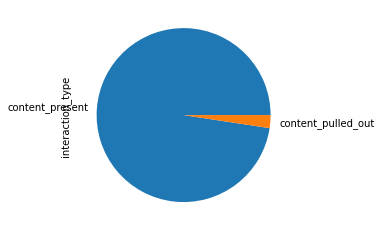

In [212]:
interaction_type.plot.pie()

In [213]:
content['producer_device_info'].value_counts()*100/content.shape[0]

Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.116 Safari/537.36                    2.274183
Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36                2.081999
Android - Native Mobile App                                                                                                  1.121076
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36                     0.928892
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36                    0.896861
                                                                                                                               ...   
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.95 Safari/537.36     0.032031
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/53

## Get Distribution of Location

In [214]:
content['producer_location'].value_counts()*100/content.shape[0]

SP     17.072389
MG      2.402306
NY      0.640615
NJ      0.512492
GA      0.224215
IL      0.192184
RJ      0.128123
ON      0.128123
SC      0.064061
NSW     0.064061
?       0.064061
TX      0.064061
FL      0.032031
AB      0.032031
WA      0.032031
MS      0.032031
RI      0.032031
CA      0.032031
13      0.032031
Name: producer_location, dtype: float64

In [215]:
location_producer = content['producer_location'].value_counts()*100/content.shape[0]

<AxesSubplot:ylabel='producer_location'>

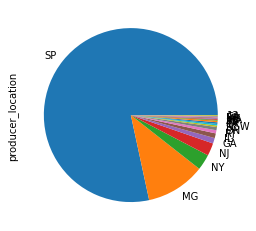

In [216]:
location_producer.plot.pie()

get the percentage

In [217]:
content['producer_country'].value_counts()*100/content.shape[0]

BR    19.634849
US     1.889814
CA     0.160154
AU     0.064061
PT     0.032031
Name: producer_country, dtype: float64

In [218]:
country_stats = content['producer_country'].value_counts()*100/content.shape[0]

<AxesSubplot:ylabel='producer_country'>

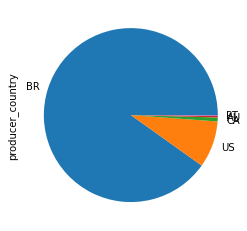

In [219]:
country_stats.plot.pie()

In [220]:
content['item_type'].value_counts()*100/content.shape[0]

HTML     99.327354
VIDEO     0.352338
RICH      0.320307
Name: item_type, dtype: float64

In [221]:
content_stats = content['item_type'].value_counts()*100/content.shape[0]

<AxesSubplot:>

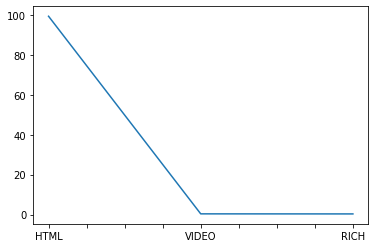

In [222]:
content_stats.plot()

In [223]:
content['language'].value_counts()*100/content.shape[0]

en    72.517617
pt    27.226137
la     0.128123
es     0.064061
ja     0.064061
Name: language, dtype: float64

In [224]:
language_stats = content['language'].value_counts()*100/content.shape[0]

<AxesSubplot:>

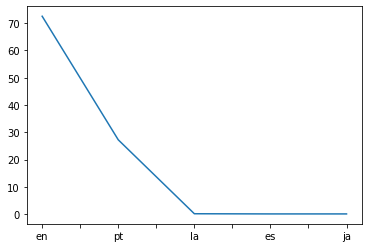

In [225]:
language_stats.plot()

<AxesSubplot:ylabel='language'>

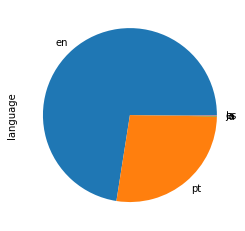

In [226]:
language_stats.plot.pie()

In [227]:
content['interaction_type']=='content_present'

0       False
1        True
2        True
3        True
4        True
        ...  
3117     True
3118     True
3119     True
3120     True
3121     True
Name: interaction_type, Length: 3122, dtype: bool

In [228]:
content['language']=='en'

0        True
1        True
2        True
3        True
4        True
        ...  
3117    False
3118     True
3119     True
3120     True
3121     True
Name: language, Length: 3122, dtype: bool

In [229]:
(content['language']=='en') & (content['interaction_type']=='content_present')

0       False
1        True
2        True
3        True
4        True
        ...  
3117    False
3118     True
3119     True
3120     True
3121     True
Length: 3122, dtype: bool

In [230]:
content_filtered = content[(content['language']=='en') & (content['interaction_type']=='content_present')]

In [231]:
content.shape

(3122, 13)

In [232]:
content_filtered.shape

(2211, 13)

In [233]:
content_filtered.head(6)

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
1,1459193988,content_present,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,content_present,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,content_present,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,content_present,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en
5,1459194522,content_present,-2826566343807132236,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.coindesk.com/ieee-blockchain-oxford...,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,en
6,1459194557,content_present,-2148899391355011268,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.newsbtc.com/2016/03/28/banks-need-c...,Banks Need To Collaborate With Bitcoin and Fin...,It will take time until banks come around to t...,en


In [234]:
pd.set_option('max_colwidth', None)

In [236]:
content_filtered.head()

event_timestamp interaction_type              item_id          producer_id  \
1       1459193988  content_present -4110354420726924665  4340306774493623681   
2       1459194146  content_present -7292285110016212249  4340306774493623681   
3       1459194474  content_present -6151852268067518688  3891637997717104548   
4       1459194497  content_present  2448026894306402386  4340306774493623681   
5       1459194522  content_present -2826566343807132236  4340306774493623681   

   producer_session_id producer_device_info producer_location  \
1  8940341205206233829                  NaN               NaN   
2  8940341205206233829                  NaN               NaN   
3 -1457532940883382585                  NaN               NaN   
4  8940341205206233829                  NaN               NaN   
5  8940341205206233829                  NaN               NaN   

  producer_country item_type  \
1              NaN      HTML   
2              NaN      HTML   
3              NaN      HTML   
4              NaN      HTML   
5              NaN      HTML   

                                                                                                                        item_url  \
1  http://www.nytimes.com/2016/03/28/business/dealbook/ethereum-a-virtual-currency-enables-transactions-that-rival-bitcoins.html   
2                                http://cointelegraph.com/news/bitcoin-future-when-gbpcoin-of-branson-wins-over-usdcoin-of-trump   
3                                                  https://cloudplatform.googleblog.com/2016/03/Google-Data-Center-360-Tour.html   
4                    https://bitcoinmagazine.com/articles/ibm-wants-to-evolve-the-internet-with-blockchain-technology-1459189322   
5                                                                http://www.coindesk.com/ieee-blockchain-oxford-cloud-computing/   

                                                                     title  \
1  Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's   
2       Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump   
3                                             Google Data Center 360° Tour   
4            IBM Wants to "Evolve the Internet" With Blockchain Technology   
5         IEEE to Talk Blockchain at Cloud Computing Oxford-Con - CoinDesk   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [237]:
content_filtered.columns

Index(['event_timestamp', 'interaction_type', 'item_id', 'producer_id',
       'producer_session_id', 'producer_device_info', 'producer_location',
       'producer_country', 'item_type', 'item_url', 'title',
       'text_description', 'language'],
      dtype='object')

In [238]:
content_selected = content_filtered[['item_url', 'title', 'text_description']]

In [239]:
content_selected.shape

(2211, 3)

In [240]:
content_selected.head()

item_url  \
1  http://www.nytimes.com/2016/03/28/business/dealbook/ethereum-a-virtual-currency-enables-transactions-that-rival-bitcoins.html   
2                                http://cointelegraph.com/news/bitcoin-future-when-gbpcoin-of-branson-wins-over-usdcoin-of-trump   
3                                                  https://cloudplatform.googleblog.com/2016/03/Google-Data-Center-360-Tour.html   
4                    https://bitcoinmagazine.com/articles/ibm-wants-to-evolve-the-internet-with-blockchain-technology-1459189322   
5                                                                http://www.coindesk.com/ieee-blockchain-oxford-cloud-computing/   

                                                                     title  \
1  Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's   
2       Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump   
3                                             Google Data Center 360° Tour   
4            IBM Wants to "Evolve the Internet" With Blockchain Technology   
5         IEEE to Talk Blockchain at Cloud Computing Oxford-Con - CoinDesk   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

# Content Based Recommendations

In [241]:
keywords_array = content_selected['text_description'].to_numpy()

In [242]:
keywords_array

array(['All of this work is still very early. The first full public version of the Ethereum software was recently released, and the system could face some of the same technical and legal problems that have tarnished Bitcoin. Many Bitcoin advocates say Ethereum will face more security problems than Bitcoin because of the greater complexity of the software. Thus far, Ethereum has faced much less testing, and many fewer attacks, than Bitcoin. The novel design of Ethereum may also invite intense scrutiny by authorities given that potentially fraudulent contracts, like the Ponzi schemes, can be written directly into the Ethereum system. But the sophisticated capabilities of the system have made it fascinating to some executives in corporate America. IBM said last year that it was experimenting with Ethereum as a way to control real world objects in the so-called Internet of things. Microsoft has been working on several projects that make it easier to use Ethereum on its computing cloud, Azu

In [244]:

keywords_array[0]

'All of this work is still very early. The first full public version of the Ethereum software was recently released, and the system could face some of the same technical and legal problems that have tarnished Bitcoin. Many Bitcoin advocates say Ethereum will face more security problems than Bitcoin because of the greater complexity of the software. Thus far, Ethereum has faced much less testing, and many fewer attacks, than Bitcoin. The novel design of Ethereum may also invite intense scrutiny by authorities given that potentially fraudulent contracts, like the Ponzi schemes, can be written directly into the Ethereum system. But the sophisticated capabilities of the system have made it fascinating to some executives in corporate America. IBM said last year that it was experimenting with Ethereum as a way to control real world objects in the so-called Internet of things. Microsoft has been working on several projects that make it easier to use Ethereum on its computing cloud, Azure. "Et

In [243]:
len(keywords_array), len(keywords_array[0])

(2211, 6543)

In [245]:
words_list = []

for keyword in keywords_array:
    
    splitted_words = keyword.lower().split()
    
    words_list.append(splitted_words)

In [246]:
words_list[0]

['all',
 'of',
 'this',
 'work',
 'is',
 'still',
 'very',
 'early.',
 'the',
 'first',
 'full',
 'public',
 'version',
 'of',
 'the',
 'ethereum',
 'software',
 'was',
 'recently',
 'released,',
 'and',
 'the',
 'system',
 'could',
 'face',
 'some',
 'of',
 'the',
 'same',
 'technical',
 'and',
 'legal',
 'problems',
 'that',
 'have',
 'tarnished',
 'bitcoin.',
 'many',
 'bitcoin',
 'advocates',
 'say',
 'ethereum',
 'will',
 'face',
 'more',
 'security',
 'problems',
 'than',
 'bitcoin',
 'because',
 'of',
 'the',
 'greater',
 'complexity',
 'of',
 'the',
 'software.',
 'thus',
 'far,',
 'ethereum',
 'has',
 'faced',
 'much',
 'less',
 'testing,',
 'and',
 'many',
 'fewer',
 'attacks,',
 'than',
 'bitcoin.',
 'the',
 'novel',
 'design',
 'of',
 'ethereum',
 'may',
 'also',
 'invite',
 'intense',
 'scrutiny',
 'by',
 'authorities',
 'given',
 'that',
 'potentially',
 'fraudulent',
 'contracts,',
 'like',
 'the',
 'ponzi',
 'schemes,',
 'can',
 'be',
 'written',
 'directly',
 'into',
 

In [247]:
len(words_list), len(words_list[0]), len(words_list[1])

(2211, 1072, 311)

In [ ]:
#! pip install gensim

In [248]:
from gensim.corpora.dictionary import Dictionary

# create a dictionary from words list
dictionary = Dictionary(words_list) 

#create corpus where the corpus is a bag of words for each document
corpus = [dictionary.doc2bow(doc) for doc in words_list] 

from gensim.models.tfidfmodel import TfidfModel
#create tfidf model of the corpus
tfidf = TfidfModel(corpus) 

from gensim.similarities import MatrixSimilarity
# Create the similarity matrix. This is the most important part where we get the similarities between the news.
sims = MatrixSimilarity(tfidf[corpus], num_features=len(dictionary))


In [249]:
print(sims)

MatrixSimilarity<2211 docs, 113134 features>


In [250]:
def news_recommendation(news_title):
    # get the news row
    news = content_selected.loc[content_selected.title==news_title] 
    
    #split the keywords
    keywords = news['text_description'].iloc[0].split() 

    #set the list of words to query_doc
    query_doc = keywords 
    
    # get a bag of words from the query_doc
    query_doc_bow = dictionary.doc2bow(query_doc) 

    #convert the regular bag of words model to a tf-idf model
    query_doc_tfidf = tfidf[query_doc_bow] 
    
    # get similarity values between input news and all other news
    similarity_array = sims[query_doc_tfidf] 
    
    #Convert to a Series
    similarity_series = pd.Series(similarity_array.tolist(), index=content_selected.title.values) 

    #get the most similar news 
    similarity_output = similarity_series.sort_values(ascending=False)
    return similarity_output

In [251]:
news_recommendation('Google Data Center 360° Tour')[:10]

Google Data Center 360° Tour                                                            0.802829
Google shares data center security and design best practices                            0.158404
Slack swips at Skype with video calls and reaction emoji                                0.119946
[Tools] Free Business Video Conference with Screen Sharing, Permanent Room              0.103585
Globo.com Uses NGINX for Streaming Media to 500,000+ Viewers                            0.093740
Doing Data Science Right - Your Most Common Questions Answered                          0.091469
[Tools] How to Record your Desktop Screen with YouTube                                  0.087743
Google launches Duo video calling app, a dull cross-OS FaceTime rival                   0.082372
Talking Payments - Article Profile - 93% of banks expect video to boost satisfaction    0.077295
So long MVP. Hello Minimum Loveable Product.                                            0.074742
dtype: float64

In [252]:
news_recommendation('Bayesian machine learning')[:10]

Bayesian machine learning                                                       0.641118
Generative Models                                                               0.194991
A Technical Primer On Causality                                                 0.159271
An introduction to Generative Adversarial Networks (with code in TensorFlow)    0.156609
Ultimate AI battle - Apple vs. Google                                           0.144368
Approaching (Almost) Any Machine Learning Problem | Abhishek Thakur             0.142956
How to choose algorithms for Microsoft Azure Machine Learning                   0.138584
Approaching (Almost) Any Machine Learning Problem                               0.138135
Machine Learning for Designers                                                  0.137233
5 Skills You Need to Become a Machine Learning Engineer | Udacity               0.131510
dtype: float64

In [253]:
news_recommendation('How to grow your startup with no budget')[:10]

How to grow your startup with no budget                                              0.939814
State of the Digital Nation 2016                                                     0.160669
So long MVP. Hello Minimum Loveable Product.                                         0.141626
Marketing Technology Landscape Supergraphic (2016) - Chief Marketing Technologist    0.138221
How to get the most from your agency relationships in 2017                           0.138148
The Mobile Growth Stack: 2017 Edition - Mobile Growth Stack                          0.128697
CMO interview: Putting IBM's marketing technology under the microscope               0.123627
Gartner Hype Cycle for Digital Marketing and Advertising                             0.122357
What do Design Thinking and Marketing have in common?                                0.121540
Multi-Channel Marketing in 2015 - It's not rocket science.                           0.120632
dtype: float64

In [254]:
news_recommendation('IBM Watson is Working to Bring AI to the Blockchain - CoinDesk')[:10]

IBM Watson is Working to Bring AI to the Blockchain - CoinDesk        0.741202
Decentralizing IoT networks through blockchain                        0.249475
Blockchain Huge Potential For The Insurance Industry                  0.193467
Red Hat OpenShift Blockchain Initiative Focuses On Ethereum           0.191802
Walt Disney Now Loves Blockchain, Going Trustless in Seattle          0.184384
The Blockchain is the new Google                                      0.176943
Why Many Smart Contract Use Cases Are Simply Impossible - CoinDesk    0.166346
Why Many Smart Contract Use Cases Are Simply Impossible - CoinDesk    0.166346
Microsoft Strikes Partnership With Banks on Blockchain Tech           0.158306
Venture Capitalists Inject Nearly Half a Billion in Bitcoin           0.157295
dtype: float64

In [255]:
news_recommendation('Nvidia announces a supercomputer aimed at deep learning and AI')[:10]

Nvidia announces a supercomputer aimed at deep learning and AI                                0.804899
Machine Learning is Fun! Part 3: Deep Learning and Convolutional Neural Networks              0.136677
Baidu Research grills AI models on deep learning                                              0.120639
Why Deep Learning Is Suddenly Changing Your Life                                              0.119753
Machine Learning for Designers                                                                0.111805
Physicists have discovered what makes neural networks so extraordinarily powerful             0.103459
My Top 9 Favorite Python Deep Learning Libraries - PyImageSearch                              0.102187
rasbt/python-machine-learning-book                                                            0.097102
Stream processing, Event sourcing, Reactive, CEP... and making sense of it all - Confluent    0.094416
Stream processing, Event sourcing, Reactive, CEP... and making sense of i

In [256]:
news_recommendation('5 Ways to Save Time During Research | Viget')[:10]

5 Ways to Save Time During Research | Viget                                                  0.937636
7 Mistakes Most Beginners Make When A/B Testing                                              0.115188
How Netflix does A/B testing - InVision Blog                                                 0.095676
Why 5 is the magic number for UX usability testing                                           0.095291
How Netflix does A/B Testing - uxdesign.cc - User Experience Design                          0.093335
How Netflix does A/B Testing - uxdesign.cc - User Experience Design                          0.093313
Microservices testing                                                                        0.089210
Live asynchronously.                                                                         0.085418
A plan for media management in Drupal 8                                                      0.083926
What 2 Years of Android Development Have Taught Me the Hard Way - Thought's by Ari

In [257]:
news_recommendation('Bash on Ubuntu on Windows - Download Now!')[:10]

Bash on Ubuntu on Windows - Download Now!                                                          0.633955
PostgreSQL Bloat: origins, monitoring and managing                                                 0.102669
Webinar Salesforce - Best Practices for Advanced Lightning Apps                                    0.096747
Build Apps Faster with Salesforce - Webinar                                                        0.094854
How to Install and Use the Linux Bash Shell on Windows 10                                          0.091083
Digital Consumers Forced to Open Accounts in Branches                                              0.083141
Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet                          0.080246
Mobile UX Design: The Right Ways to Ask Users for Permissions - UX Planet                          0.078053
The Ultimate Digital Clean-Up Checklist: Are You Prepared For The New Year? - Smashing Magazine    0.074621
So long MVP. Hello Minimum L

In [258]:
news_rec = news_recommendation('Hopper raises $16 million for a travel app that tells you the best time to fly')

In [259]:
news_rec

Hopper raises $16 million for a travel app that tells you the best time to fly                               0.693542
A sneak peek at Google's upcoming travel app, Trips                                                          0.124992
How to send better push notifications - the complete guide to push notifications - Growth Bug - App World    0.110059
State of the Digital Nation 2016                                                                             0.089201
Bots won't replace apps. Better apps will replace apps.                                                      0.086670
                                                                                                               ...   
Presenting to the Boss(es) | Pluralsight                                                                     0.000798
Linus Torvalds: The mind behind Linux                                                                        0.000695
Linus Torvalds: The mind behind Linux                   

In [260]:
news_df = pd.DataFrame(news_rec)

In [262]:
news_df.head()

,0
Hopper raises $16 million for a travel app that tells you the best time to fly,0.693542
"A sneak peek at Google's upcoming travel app, Trips",0.124992
How to send better push notifications - the complete guide to push notifications - Growth Bug - App World,0.110059
State of the Digital Nation 2016,0.089201
Bots won't replace apps. Better apps will replace apps.,0.086670


In [263]:
news_df.reset_index(inplace=True)

In [264]:
news_df.head()

,index,0
0,Hopper raises $16 million for a travel app that tells you the best time to fly,0.693542
1,"A sneak peek at Google's upcoming travel app, Trips",0.124992
2,How to send better push notifications - the complete guide to push notifications - Growth Bug - App World,0.110059
3,State of the Digital Nation 2016,0.089201
4,Bots won't replace apps. Better apps will replace apps.,0.086670


In [265]:
news_df.columns = ['title', 'score']

In [266]:
news_df.head()

,title,score
0,Hopper raises $16 million for a travel app that tells you the best time to fly,0.693542
1,"A sneak peek at Google's upcoming travel app, Trips",0.124992
2,How to send better push notifications - the complete guide to push notifications - Growth Bug - App World,0.110059
3,State of the Digital Nation 2016,0.089201
4,Bots won't replace apps. Better apps will replace apps.,0.086670


In [267]:
news_df.shape

(2211, 2)

In [268]:
news_df['content_score_normalized'] = (news_df['score']-min(news_df['score'])) / (max(news_df['score']) - min(news_df['score']))

In [269]:
news_df.head()

,title,score,content_score_normalized
0,Hopper raises $16 million for a travel app that tells you the best time to fly,0.693542,1.000000
1,"A sneak peek at Google's upcoming travel app, Trips",0.124992,0.180072
2,How to send better push notifications - the complete guide to push notifications - Growth Bug - App World,0.110059,0.158537
3,State of the Digital Nation 2016,0.089201,0.128457
4,Bots won't replace apps. Better apps will replace apps.,0.086670,0.124807


In [270]:
type(news_df)

pandas.core.frame.DataFrame

In [271]:
news_df.describe()

,score,content_score_normalized
count,2211.000000,2211.000000
mean,0.025237,0.036211
std,0.020025,0.028878
min,0.000127,0.000000
25%,0.014972,0.021408
50%,0.022800,0.032696
75%,0.032075,0.046072
max,0.693542,1.000000


# Hybrid: [Collaborative Item Base + Content Based]

In [272]:
collab_output.head()

,news_id,item_id,title,score,collaborative_score_normalized
0,20,-9107331682787867601,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000,1.000000
1,2892,8659918766210334195,5 Latin Trends for 2017 | TrendWatching,0.520117,0.520117
2,955,-3351990231604537690,Carrinho de criança carrega seu smartphone usando geradores instalados nas rodas,0.518050,0.518050
3,1028,-2860224288374811338,How I Passed the AWS Solutions Architect Professional Exam,0.508072,0.508072
4,2501,6237714845306489877,How CEOs Can Keep Their Analytics Programs from Being a Waste of Time,0.500000,0.500000


In [273]:
news_df.head()

,title,score,content_score_normalized
0,Hopper raises $16 million for a travel app that tells you the best time to fly,0.693542,1.000000
1,"A sneak peek at Google's upcoming travel app, Trips",0.124992,0.180072
2,How to send better push notifications - the complete guide to push notifications - Growth Bug - App World,0.110059,0.158537
3,State of the Digital Nation 2016,0.089201,0.128457
4,Bots won't replace apps. Better apps will replace apps.,0.086670,0.124807


In [274]:
hybrid_output = pd.merge(collab_output, news_df, how='left', on='title')

In [275]:
hybrid_output.head()

,news_id,item_id,title,score_x,collaborative_score_normalized,score_y,content_score_normalized
0,20,-9107331682787867601,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000,1.000000,0.693542,1.000000
1,2892,8659918766210334195,5 Latin Trends for 2017 | TrendWatching,0.520117,0.520117,0.019544,0.028001
2,955,-3351990231604537690,Carrinho de criança carrega seu smartphone usando geradores instalados nas rodas,0.518050,0.518050,NaN,NaN
3,1028,-2860224288374811338,How I Passed the AWS Solutions Architect Professional Exam,0.508072,0.508072,0.027405,0.039338
4,2501,6237714845306489877,How CEOs Can Keep Their Analytics Programs from Being a Waste of Time,0.500000,0.500000,0.013186,0.018832


In [276]:
hybrid_output.shape

(3180, 7)

In [277]:
hybrid_output['final_score'] = (hybrid_output['collaborative_score_normalized'] + hybrid_output['content_score_normalized'])/2

In [278]:
hybrid_output.head()

,news_id,item_id,title,score_x,collaborative_score_normalized,score_y,content_score_normalized,final_score
0,20,-9107331682787867601,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000,1.000000,0.693542,1.000000,1.000000
1,2892,8659918766210334195,5 Latin Trends for 2017 | TrendWatching,0.520117,0.520117,0.019544,0.028001,0.274059
2,955,-3351990231604537690,Carrinho de criança carrega seu smartphone usando geradores instalados nas rodas,0.518050,0.518050,NaN,NaN,NaN
3,1028,-2860224288374811338,How I Passed the AWS Solutions Architect Professional Exam,0.508072,0.508072,0.027405,0.039338,0.273705
4,2501,6237714845306489877,How CEOs Can Keep Their Analytics Programs from Being a Waste of Time,0.500000,0.500000,0.013186,0.018832,0.259416


In [279]:
hybrid_output = hybrid_output[['title','final_score']]

In [280]:
hybrid_output.head()

,title,final_score
0,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000
1,5 Latin Trends for 2017 | TrendWatching,0.274059
2,Carrinho de criança carrega seu smartphone usando geradores instalados nas rodas,NaN
3,How I Passed the AWS Solutions Architect Professional Exam,0.273705
4,How CEOs Can Keep Their Analytics Programs from Being a Waste of Time,0.259416


In [281]:
hybrid_output.sort_values(by='final_score', ascending=False)[:10]

,title,final_score
0,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000
7,Ebay's mobile Craigslist competitor Close5 has quietly grown to 7 million downloads,0.290013
24,Hollar snags another $30 million for its fast-growing dollar store app,0.283874
15,The new tech talent you need to succeed in digital,0.280805
20,How will bots make money? Here are 7 business models,0.275110
1,5 Latin Trends for 2017 | TrendWatching,0.274059
8,The omnichannel customer experience is poised to take off in regulated industries,0.273910
3,How I Passed the AWS Solutions Architect Professional Exam,0.273705
21,CMO interview: Putting IBM's marketing technology under the microscope,0.270490
14,Finding The Meaning Of Artificial Intelligence At Google I/O,0.269373


In [282]:
hybrid_output.shape

(3180, 2)

In [283]:
hybrid_output = hybrid_output.drop_duplicates()

In [284]:
hybrid_output.shape

(2968, 2)

In [285]:
hybrid_output.sort_values(by='final_score', ascending=False)[:10]

,title,final_score
0,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000
7,Ebay's mobile Craigslist competitor Close5 has quietly grown to 7 million downloads,0.290013
24,Hollar snags another $30 million for its fast-growing dollar store app,0.283874
15,The new tech talent you need to succeed in digital,0.280805
20,How will bots make money? Here are 7 business models,0.275110
1,5 Latin Trends for 2017 | TrendWatching,0.274059
8,The omnichannel customer experience is poised to take off in regulated industries,0.273910
3,How I Passed the AWS Solutions Architect Professional Exam,0.273705
21,CMO interview: Putting IBM's marketing technology under the microscope,0.270490
14,Finding The Meaning Of Artificial Intelligence At Google I/O,0.269373


# ALS

In [ ]:
#!pip install implicit==0.4.4

In [286]:

import pandas as pd
import numpy as np

from scipy.sparse import csr_matrix

import implicit

from implicit.evaluation import train_test_split

In [287]:
consumer_rating.head()

,consumer_id,item_id,rating,news_id,user_id
0,-8845298781299428018,-3499919498720038879,1.183774,933,33
1,-1032019229384696495,8890720798209849691,1.183774,2933,831
2,-1130272294246983140,310515487419366995,1.183774,1537,826
3,344280948527967603,310515487419366995,51.394456,1537,974
4,-445337111692715325,-7820640624231356730,1.183774,246,887


In [288]:
consumer_rating.shape

(50938, 5)

## Create Sparse User-Item Matrix

In [289]:
alpha = 40

In [290]:
ratings.shape[0]

50938

In [291]:
sparse_user_item = csr_matrix( ([alpha]*consumer_rating.shape[0], (consumer_rating['user_id'], consumer_rating['news_id']) ))

In [292]:
sparse_user_item

<1895x2987 sparse matrix of type '<class 'numpy.int64'>'
	with 40710 stored elements in Compressed Sparse Row format>

### shape : 1895x2987.  since Total No of users = 1895, No of News = 2987

### Convert to Array

In [295]:
csr_user_array = sparse_user_item.toarray()

In [296]:
csr_user_array

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 80,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [297]:
len(csr_user_array), len(csr_user_array[0]), csr_user_array[1][1]

(1895, 2987, 0)

In [298]:
max(csr_user_array[1])

80

### Create item-user sparse matrix

In [299]:
sparse_item_user = sparse_user_item.T.tocsr()

In [300]:
sparse_item_user

<2987x1895 sparse matrix of type '<class 'numpy.int64'>'
	with 40710 stored elements in Compressed Sparse Row format>

In [301]:
csr_item_array = sparse_item_user.toarray()

In [302]:
csr_item_array

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 80, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [303]:
len(csr_item_array), len(csr_item_array[0]), csr_item_array[1][1]

(2987, 1895, 0)

## Create train, test data

In [304]:

train, test = train_test_split(sparse_item_user, train_percentage=0.8)

## Building ALS Model

In [306]:

model = implicit.als.AlternatingLeastSquares(factors=100, regularization=0.1, iterations=20, calculate_training_loss=False)


In [307]:
model

### Train the Model

In [308]:
model.fit(train)

## Generating recommendations for a user_id

In [309]:
user_id = 17

In [310]:
model.recommend(user_id, sparse_user_item, N=3000)

[(2095, 1.1180236),
 (1859, 0.97055596),
 (1812, 0.92142296),
 (1764, 0.89671445),
 (969, 0.86402196),
 (546, 0.8416943),
 (2245, 0.84089375),
 (2650, 0.8385402),
 (2071, 0.8225815),
 (1228, 0.80994636),
 (314, 0.8027643),
 (2689, 0.7767871),
 (682, 0.7580234),
 (1594, 0.74516565),
 (2138, 0.7288252),
 (626, 0.7085894),
 (2110, 0.7005021),
 (386, 0.69956434),
 (2970, 0.69156647),
 (468, 0.6800369),
 (916, 0.67637646),
 (1076, 0.6740222),
 (1298, 0.66555846),
 (340, 0.6622706),
 (2624, 0.66125107),
 (2571, 0.6551273),
 (1645, 0.6487565),
 (1843, 0.644398),
 (1486, 0.64010483),
 (1836, 0.6322924),
 (2581, 0.63199145),
 (2296, 0.62744236),
 (1778, 0.62217593),
 (945, 0.6206732),
 (2258, 0.5977069),
 (935, 0.5768297),
 (2120, 0.5731971),
 (1347, 0.57228017),
 (2893, 0.5661924),
 (2411, 0.560154),
 (263, 0.5582083),
 (160, 0.5542729),
 (899, 0.552049),
 (1326, 0.55155784),
 (1801, 0.5494796),
 (536, 0.5417277),
 (75, 0.5404142),
 (684, 0.5314739),
 (609, 0.5299421),
 (1403, 0.5294862),
 (21

In [311]:
model.recommend(user_id, sparse_user_item, N=10)

[(2095, 1.1180236),
 (1859, 0.97055596),
 (1812, 0.92142296),
 (1764, 0.89671445),
 (969, 0.86402196),
 (546, 0.8416943),
 (2245, 0.84089375),
 (2650, 0.8385402),
 (2071, 0.8225815),
 (1228, 0.80994636)]

## Generating recommendations for News_id

In [342]:

item_id = 20
n_similar = 2987

In [343]:

similar = model.similar_items(item_id, n_similar)


In [344]:
similar

[(20, 0.9999999),
 (1905, 0.9025069),
 (1752, 0.89276063),
 (620, 0.80205363),
 (1424, 0.78178257),
 (968, 0.7816864),
 (2560, 0.7815305),
 (22, 0.7815304),
 (874, 0.7815303),
 (2203, 0.78153026),
 (2670, 0.78153026),
 (787, 0.7815302),
 (172, 0.78153014),
 (1637, 0.78153014),
 (1638, 0.78153014),
 (232, 0.7815301),
 (2347, 0.76812327),
 (896, 0.69816107),
 (58, 0.69780415),
 (2856, 0.6974792),
 (2427, 0.6974713),
 (809, 0.69016695),
 (824, 0.68794584),
 (1197, 0.68600065),
 (1473, 0.66033334),
 (110, 0.627705),
 (2746, 0.6197701),
 (220, 0.60290647),
 (2781, 0.6029021),
 (2785, 0.6028944),
 (2032, 0.60147834),
 (1845, 0.6001562),
 (2114, 0.5994292),
 (1417, 0.59660244),
 (452, 0.59656614),
 (492, 0.59402233),
 (800, 0.5937528),
 (1723, 0.59320414),
 (1942, 0.59188396),
 (925, 0.59067965),
 (2935, 0.5905999),
 (436, 0.5833349),
 (2662, 0.5785215),
 (558, 0.57790166),
 (1760, 0.57778364),
 (1610, 0.5717476),
 (1989, 0.56989753),
 (1636, 0.5687604),
 (338, 0.5671617),
 (2939, 0.5653514),

In [345]:
output = pd.DataFrame(similar, columns=['news_id', 'als_score'])

In [346]:
output.head()

,news_id,als_score
0,20,1.000000
1,1905,0.902507
2,1752,0.892761
3,620,0.802054
4,1424,0.781783


In [347]:
output.shape

(2987, 2)

In [348]:
item_mapping_final.head()

,item_id,news_id
0,-3499919498720038879,933
1,8890720798209849691,2933
2,310515487419366995,1537
4,-7820640624231356730,246
6,-8864073373672512525,82


In [349]:
als_output = pd.merge(output, item_mapping_final, on='news_id', how='left')

In [350]:
als_output.head()

,news_id,als_score,item_id
0,20,1.000000,-9107331682787867601
1,1905,0.902507,2668307045795933565
2,1752,0.892761,1665726676688122621
3,620,0.802054,-5522643017727334716
4,1424,0.781783,-340541651592032197


In [351]:
news_title.head()

,item_id,title
0,-6451309518266745024,"Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's"
1,-4110354420726924665,"Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's"
2,-7292285110016212249,Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump
3,-6151852268067518688,Google Data Center 360° Tour
4,2448026894306402386,"IBM Wants to ""Evolve the Internet"" With Blockchain Technology"


In [352]:
als_output_title = pd.merge(als_output, news_title, on='item_id', how='left')

In [353]:
als_output_title.head()

,news_id,als_score,item_id,title
0,20,1.000000,-9107331682787867601,Hopper raises $16 million for a travel app that tells you the best time to fly
1,1905,0.902507,2668307045795933565,"Blab shuts down, but founders promise new product on the way"
2,1752,0.892761,1665726676688122621,"Inatel lança seu Smart Campus, um laboratório vivo para demonstração de projetos na área de IoT - Startupi"
3,620,0.802054,-5522643017727334716,Introducing the Startup Battlefield companies of Disrupt NY 2016
4,1424,0.781783,-340541651592032197,Relating a Problem Definition to IoT Architecture | Intel® Software


In [354]:
als_output_title

,news_id,als_score,item_id,title
0,20,1.000000,-9107331682787867601,Hopper raises $16 million for a travel app that tells you the best time to fly
1,1905,0.902507,2668307045795933565,"Blab shuts down, but founders promise new product on the way"
2,1752,0.892761,1665726676688122621,"Inatel lança seu Smart Campus, um laboratório vivo para demonstração de projetos na área de IoT - Startupi"
3,620,0.802054,-5522643017727334716,Introducing the Startup Battlefield companies of Disrupt NY 2016
4,1424,0.781783,-340541651592032197,Relating a Problem Definition to IoT Architecture | Intel® Software
...,...,...,...,...
3044,2444,-0.249086,5937899505996968869,The web is Doom - mobiForge
3045,2575,-0.249547,6765368095966422513,What is Affective Computing And How Could Emotional Machines Change Our Lives?
3046,1098,-0.249952,-2355230755276061204,Lançado 1º E-commerce de Mão de Obra Operacional do Brasil
3047,2066,-0.252071,3611701510490148233,The Biggest Crowdfunding Project Ever Was Supposed to Create Manager-free Companies. But It's a Mess


In [355]:
als_output_title['als_score_normalized'] = (als_output_title['als_score']-min(als_output_title['als_score'])) / (max(als_output_title['als_score']) - min(als_output_title['als_score']))

In [356]:
als_output_title

,news_id,als_score,item_id,title,als_score_normalized
0,20,1.000000,-9107331682787867601,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000
1,1905,0.902507,2668307045795933565,"Blab shuts down, but founders promise new product on the way",0.923269
2,1752,0.892761,1665726676688122621,"Inatel lança seu Smart Campus, um laboratório vivo para demonstração de projetos na área de IoT - Startupi",0.915598
3,620,0.802054,-5522643017727334716,Introducing the Startup Battlefield companies of Disrupt NY 2016,0.844208
4,1424,0.781783,-340541651592032197,Relating a Problem Definition to IoT Architecture | Intel® Software,0.828254
...,...,...,...,...,...
3044,2444,-0.249086,5937899505996968869,The web is Doom - mobiForge,0.016917
3045,2575,-0.249547,6765368095966422513,What is Affective Computing And How Could Emotional Machines Change Our Lives?,0.016554
3046,1098,-0.249952,-2355230755276061204,Lançado 1º E-commerce de Mão de Obra Operacional do Brasil,0.016235
3047,2066,-0.252071,3611701510490148233,The Biggest Crowdfunding Project Ever Was Supposed to Create Manager-free Companies. But It's a Mess,0.014567


# Hybrid: [ALS + Item Based Collaborative Filtering]

In [357]:
hybrid_als = pd.merge(collab_output, als_output_title, how='left', on='title')

In [358]:
hybrid_als.head()

,news_id_x,item_id_x,title,score,collaborative_score_normalized,news_id_y,als_score,item_id_y,als_score_normalized
0,20,-9107331682787867601,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000,1.000000,20,1.000000,-9107331682787867601,1.000000
1,2892,8659918766210334195,5 Latin Trends for 2017 | TrendWatching,0.520117,0.520117,2892,0.488761,8659918766210334195,0.597633
2,955,-3351990231604537690,Carrinho de criança carrega seu smartphone usando geradores instalados nas rodas,0.518050,0.518050,955,0.000000,-3351990231604537690,0.212958
3,1028,-2860224288374811338,How I Passed the AWS Solutions Architect Professional Exam,0.508072,0.508072,1028,0.102753,-2860224288374811338,0.293829
4,2501,6237714845306489877,How CEOs Can Keep Their Analytics Programs from Being a Waste of Time,0.500000,0.500000,2501,-0.148019,6237714845306489877,0.096461


In [359]:
hybrid_als.shape

(3387, 9)

In [360]:
hybrid_als['final_score'] = (hybrid_als['collaborative_score_normalized'] + hybrid_als['als_score_normalized'])/2

In [361]:
hybrid_als.head()

,news_id_x,item_id_x,title,score,collaborative_score_normalized,news_id_y,als_score,item_id_y,als_score_normalized,final_score
0,20,-9107331682787867601,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000,1.000000,20,1.000000,-9107331682787867601,1.000000,1.000000
1,2892,8659918766210334195,5 Latin Trends for 2017 | TrendWatching,0.520117,0.520117,2892,0.488761,8659918766210334195,0.597633,0.558875
2,955,-3351990231604537690,Carrinho de criança carrega seu smartphone usando geradores instalados nas rodas,0.518050,0.518050,955,0.000000,-3351990231604537690,0.212958,0.365504
3,1028,-2860224288374811338,How I Passed the AWS Solutions Architect Professional Exam,0.508072,0.508072,1028,0.102753,-2860224288374811338,0.293829,0.400950
4,2501,6237714845306489877,How CEOs Can Keep Their Analytics Programs from Being a Waste of Time,0.500000,0.500000,2501,-0.148019,6237714845306489877,0.096461,0.298230


In [363]:
hybrid_als = hybrid_als[['title','final_score']]

In [364]:
hybrid_als.head()

,title,final_score
0,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000
1,5 Latin Trends for 2017 | TrendWatching,0.558875
2,Carrinho de criança carrega seu smartphone usando geradores instalados nas rodas,0.365504
3,How I Passed the AWS Solutions Architect Professional Exam,0.400950
4,How CEOs Can Keep Their Analytics Programs from Being a Waste of Time,0.298230


In [365]:
hybrid_als.sort_values(by='final_score', ascending=False)[:10]

,title,final_score
0,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000
7,Ebay's mobile Craigslist competitor Close5 has quietly grown to 7 million downloads,0.603494
114,"Blab shuts down, but founders promise new product on the way",0.586634
28,Siga o líder,0.559060
1,5 Latin Trends for 2017 | TrendWatching,0.558875
19,Google isn't abandoning Hangouts for its new chat apps,0.551211
71,Platforms are the real powerhouses in Silicon Valley's business landscape,0.542357
38,Why Steve Jobs Was Proud to Steal Ideas,0.535598
142,Relating a Problem Definition to IoT Architecture | Intel® Software,0.516189
25,O que é benchmarking? Veja quando um concorrente se torna inspiração!,0.504880
